# Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from scipy import stats 
import statsmodels.api as sm
import random as rd
import plotly.express as px
import scipy.stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading Data into Pandas Dataframe

In [2]:
#Reading data into pandas df
df = pd.read_csv("https://raw.githubusercontent.com/chiraggarg95/DS-203-Assignments/Assignment_4/master.csv")

# Displaying part of Dataset

In [3]:
#Displaying part of dataset
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Statistical Analysis

## Data driven point estimate of Mean and Varaince

In [4]:
#finding out common years
df_1 = df[df["population"]>=10000000].sort_values(by="population", ascending=False).groupby("country")['year'].unique()
df_1 

country
Brazil                [2015, 2014, 2013, 2012, 2011, 2010, 2009, 200...
Germany               [2006, 2005, 2007, 2004, 2008, 2003, 2009, 200...
Japan                 [1989, 1988, 1990, 1987, 1991, 1986, 1992, 199...
Mexico                [2015, 2014, 2013, 2012, 2011, 2010, 2009, 200...
Philippines            [2011, 2009, 2010, 2008, 2007, 2006, 2003, 2002]
Russian Federation    [2001, 2003, 2002, 2004, 2000, 2005, 2006, 200...
Thailand              [2015, 2014, 2016, 2013, 2006, 2012, 2011, 201...
Turkey                                                     [2015, 2014]
United States         [2006, 2007, 2005, 2004, 2008, 2003, 2002, 200...
Name: year, dtype: object

In [5]:
com_yrs = list(set(df_1[0]) & set(df_1[1]) & set(df_1[2]) & set(df_1[3]) & set(df_1[8]) & set(df_1[5]))

In [6]:
#Finding top 6 most populous countries
top_6_pop_count = df[df["population"]>=10000000].sort_values(by="population", ascending=False)["country"].unique()[0:6]
print(top_6_pop_count)

['United States' 'Brazil' 'Russian Federation' 'Japan' 'Mexico' 'Germany']


In [7]:
df_trimmed = df[(df['country'].isin(top_6_pop_count) & df['year'].isin(com_yrs))]

In [8]:
df_trimmed_mean = df_trimmed.groupby(['country', 'year']).sum()[['suicides/100k pop']].reset_index().groupby('country').mean()[['suicides/100k pop']].reset_index()
df_trimmed_var = df_trimmed.groupby(['country', 'year']).sum()[['suicides/100k pop']].reset_index().groupby('country').var()[['suicides/100k pop']].reset_index()

In [9]:
means = []
vars = []
print('The data driven point estimate of mean and variance for 6 most populous countries is as follows: ')
print()
for count in top_6_pop_count:
    print(count)
    mean = float(df_trimmed_mean[df_trimmed_mean['country']==count]['suicides/100k pop'])
    means.append(mean)
    var = float(df_trimmed_var[df_trimmed_mean['country']==count]['suicides/100k pop'])
    vars.append(var)
    print('Mean: ' + str(float(df_trimmed_mean[df_trimmed_mean['country']==count]['suicides/100k pop'])))
    print('Variance: ' + str(float(df_trimmed_var[df_trimmed_var['country']==count]['suicides/100k pop'])))
    print()

The data driven point estimate of mean and variance for 6 most populous countries is as follows: 

United States
Mean: 161.64576923076922
Variance: 173.76732938461544

Brazil
Mean: 71.49538461538464
Variance: 10.067193846153842

Russian Federation
Mean: 419.47346153846144
Variance: 9370.390391538462

Japan
Mean: 252.22230769230762
Variance: 616.6464984615374

Mexico
Mean: 59.052692307692304
Variance: 28.52646846153839

Germany
Mean: 186.71884615384613
Variance: 1482.1605146153825



In [10]:
means = np.array(means)
vars = np.array(vars)

In [11]:
print(means.shape)
print(vars.shape)

(6,)
(6,)


## QQ-Plot

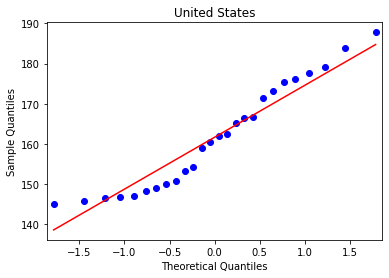

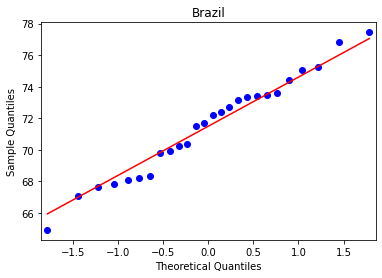

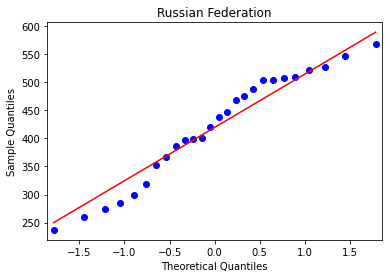

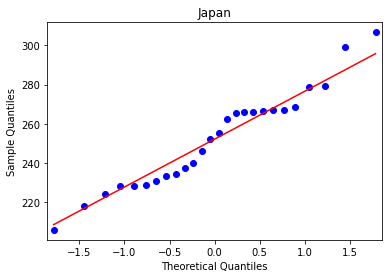

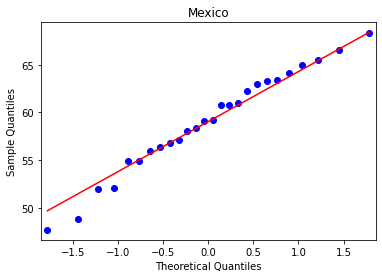

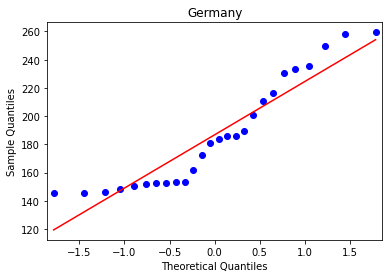

In [12]:
for count in top_6_pop_count:
    sm.qqplot(df_trimmed[df_trimmed["country"]==count].groupby(["country", "year"]).sum().reset_index()['suicides/100k pop'], line='s')
    plt.title(count)
    plt.show()

## Log Likelihood wrt Gaussian Distribution

In [13]:
for i in range (0, 6):
    count = top_6_pop_count[i]
    mean = means[i]
    var = vars[i]
    print(count + ': ')
    print(np.sum(np.log(scipy.stats.norm.pdf(df_trimmed_var[df_trimmed_var['country']==count]['suicides/100k pop'], mean, np.sqrt(var)))))
    print()

United States: 
-3.920581508227112

Brazil: 
-189.48541836724593

Russian Federation: 
-inf

Japan: 
-111.81433058151585

Mexico: 
-18.927437512568133

Germany: 
-570.6921625679903



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in log



#### The qq-plots and the Log Likelihood values correspond each other well. The closeness of the qq-plot to the straight line indicates that the distribution is more Normal. Also, a lower log likelihood value (MAGNITUDE WISE) indicates that the distribution is more normal.


## 95% Confidence Interval

In [14]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [15]:
df_yrly_suic = df_trimmed.groupby(['country', 'year']).sum().reset_index()

In [16]:
for count in top_6_pop_count:
    conf_int = mean_confidence_interval(df_yrly_suic[df_yrly_suic['country']==count]['suicides/100k pop'])
    print(count)
    print('Confidence Interval: (' + str(conf_int[1]) + ', ' + str(conf_int[2]) + ')')

United States
Confidence Interval: (156.3214104177292, 166.97012804380924)
Brazil
Confidence Interval: (70.2138289715225, 72.77694025924674)
Russian Federation
Confidence Interval: (380.37478163525196, 458.572141441671)
Japan
Confidence Interval: (242.1922972105258, 262.2523181740896)
Mexico
Confidence Interval: (56.89540863299442, 61.20997598239019)
Germany
Confidence Interval: (171.16882902894542, 202.26886327874684)


## Welch's t-test

In [17]:
df_trimmed.groupby(['country', 'year']).sum().reset_index().groupby('country').mean()[['suicides_no']]

,suicides_no
country,
Brazil,7865.884615
Germany,11202.384615
Japan,26569.576923
Mexico,3946.615385
Russian Federation,45070.038462
United States,33934.076923


#### Brazil and Mexico have the closest mean suicide rates

In [18]:
df_trimmed_yrly_suic = df_trimmed.groupby(['country', 'year']).sum()[['suicides_no']].reset_index()
df_yrly_suic_brazil = df_trimmed_yrly_suic[df_trimmed_yrly_suic['country']=='Brazil']
df_yrly_suic_mexico = df_trimmed_yrly_suic[df_trimmed_yrly_suic['country']=='Mexico']

### Shapiro test for checking whether the distribution is normal or not

In [19]:
stats.shapiro(df_yrly_suic_brazil['suicides_no'])

(0.965345025062561, 0.5074295401573181)

In [20]:
stats.shapiro(df_yrly_suic_mexico['suicides_no'])

(0.9677057266235352, 0.5648210644721985)

#### Since both the p-values are greater than 0.05, both the distribution are normal

### Performing the welch t-test on both the distributions

In [21]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var=False)
    
    print("\n",
          f"Welch's t-test= " + str(t), "\n",
          f"p-value = " + str(p), "\n",
          f"Welch-Satterthwaite Degrees of Freedom= " + str(dof))

welch_ttest(df_yrly_suic_brazil['suicides_no'], df_yrly_suic_mexico['suicides_no'])


 Welch's t-test= 8.972876661673427 
 p-value = 1.7002867225421086e-11 
 Welch-Satterthwaite Degrees of Freedom= 43.979131893319455


#### Since the p-value is less than 0.05, the null hypothesis is rejected. This means that, means of the 2 distributions are different.

## Wilcoxon signed-rank test

In [22]:
stats.wilcoxon(df_yrly_suic_brazil['suicides_no'], df_yrly_suic_mexico['suicides_no'])

WilcoxonResult(statistic=0.0, pvalue=8.29809930635731e-06)

#### Since the p-value is less than 0.05, the null hypothesis is rejected. This means that, medians of the 2 distributions are different.

## Welch's Paired t-Test

In [23]:
def welch_ttest_paired(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_rel(x, y)
    
    print("\n",
          f"Welch's t-test= " + str(t), "\n",
          f"p-value = " + str(p), "\n")

welch_ttest_paired(df_yrly_suic_brazil['suicides_no'], df_yrly_suic_mexico['suicides_no'])


 Welch's t-test= 31.74293972535655 
 p-value = 1.0082674697214755e-21 



#### Since the p-value is less than 0.05 , we reject the null hypothesis i.e. the paired distribution doesn't have same mean

## Coorelation of yearly suicide rate with HDI and GDP per capita

In [24]:
df_1 = df.groupby(['country', 'year']).agg({'suicides_no':'sum', 'HDI for year': 'mean', 'gdp_per_capita ($)': 'mean'}).reset_index()
df_1_corr = df_1.corr()
df_1_corr

,year,suicides_no,HDI for year,gdp_per_capita ($)
year,1.000000,-0.007759,0.366786,0.339188
suicides_no,-0.007759,1.000000,0.222438,0.093461
HDI for year,0.366786,0.222438,1.000000,0.771228
gdp_per_capita ($),0.339188,0.093461,0.771228,1.000000


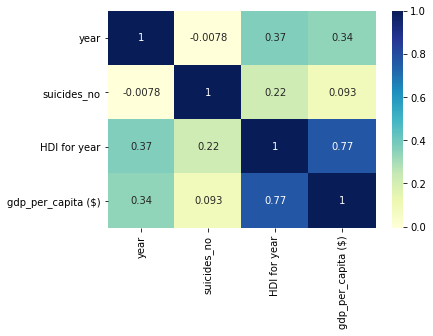

In [25]:
sns.heatmap(df_1_corr, annot=True, cmap="YlGnBu")

#### This shows that HDI and GDP per capita are positively correlated to each other to a good extent